<a href="https://colab.research.google.com/github/ssjsmith750/Akaike_DS-Assignment/blob/main/0001_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
df1 = pd.read_parquet('/content/train.parquet')
df1

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


#**Checking whether the Target variable is Balenced or not**

In [44]:
df1.Incident.value_counts

<bound method IndexOpsMixin.value_counts of 0           PRIMARY_DIAGNOSIS
1           PRIMARY_DIAGNOSIS
3              SYMPTOM_TYPE_0
4                 DRUG_TYPE_0
8                 DRUG_TYPE_1
                  ...        
29080886          DRUG_TYPE_6
29080897          DRUG_TYPE_6
29080900         DRUG_TYPE_10
29080903          DRUG_TYPE_6
29080911          DRUG_TYPE_1
Name: Incident, Length: 3220868, dtype: object>

Checking For null values

In [45]:
df1.isnull().sum()

Patient-Uid    0
Date           0
Incident       0
dtype: int64

Checking for duplicates

In [46]:
df1.duplicated().sum()


35571

In [47]:
df1 = df1.drop_duplicates()

In [48]:
df1.duplicated().sum()

0

Converting Date Variable to Date and Time format

In [49]:
from datetime import datetime, timedelta
df1['Date'] = pd.to_datetime(df1['Date']) 

In [50]:
df1.Date.dtype

dtype('<M8[ns]')

**Encoding**

In [51]:
# Encode 'TARGET DRUG' as 1 and rest as 0
df1['Incident'] = df1['Incident'].apply(lambda x: 1 if x == 'TARGET DRUG' else 0)

# Print the updated dataset
print(df1)



                                   Patient-Uid       Date  Incident
0         a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2019-03-09         0
1         a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f 2015-05-16         0
3         a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f 2018-01-30         0
4         a0dc950b-1c7c-11ec-b6ec-16262ee38c7f 2015-04-22         0
8         a0dc9543-1c7c-11ec-bb63-16262ee38c7f 2016-06-18         0
...                                        ...        ...       ...
29080886  a0ee9f75-1c7c-11ec-94c7-16262ee38c7f 2018-07-06         0
29080897  a0ee1284-1c7c-11ec-a3d5-16262ee38c7f 2017-12-29         0
29080900  a0ee9b26-1c7c-11ec-8a40-16262ee38c7f 2018-10-18         0
29080903  a0ee1a92-1c7c-11ec-8341-16262ee38c7f 2015-09-18         0
29080911  a0ee146e-1c7c-11ec-baee-16262ee38c7f 2018-10-05         0

[3185297 rows x 3 columns]


In [52]:
df1.Incident.unique()

array([0, 1])

**Feature and Target Distribution**

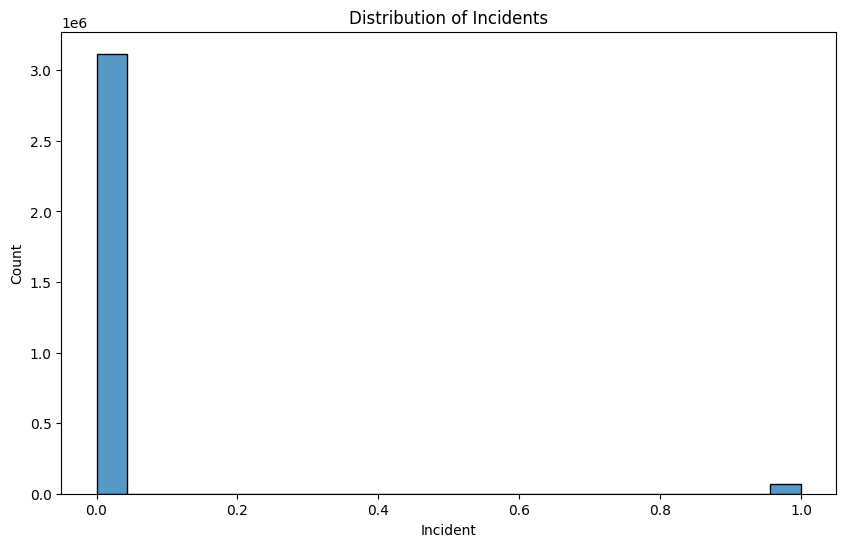

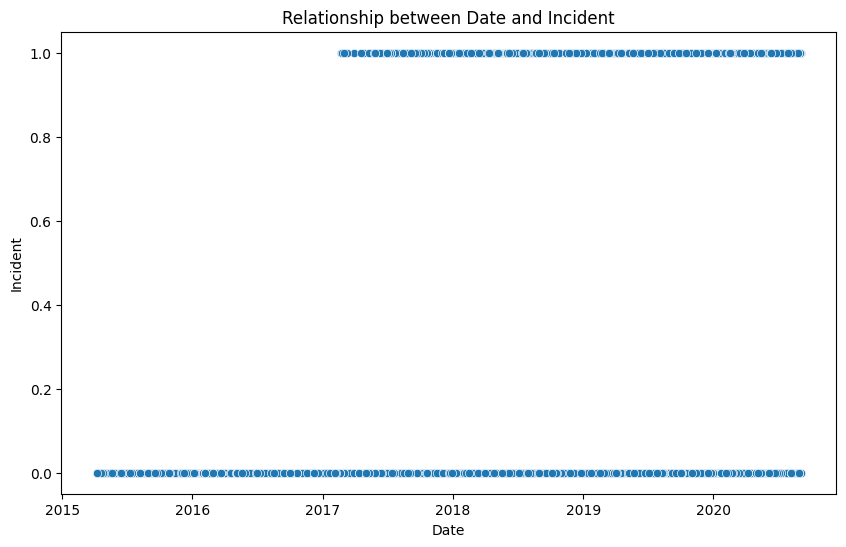

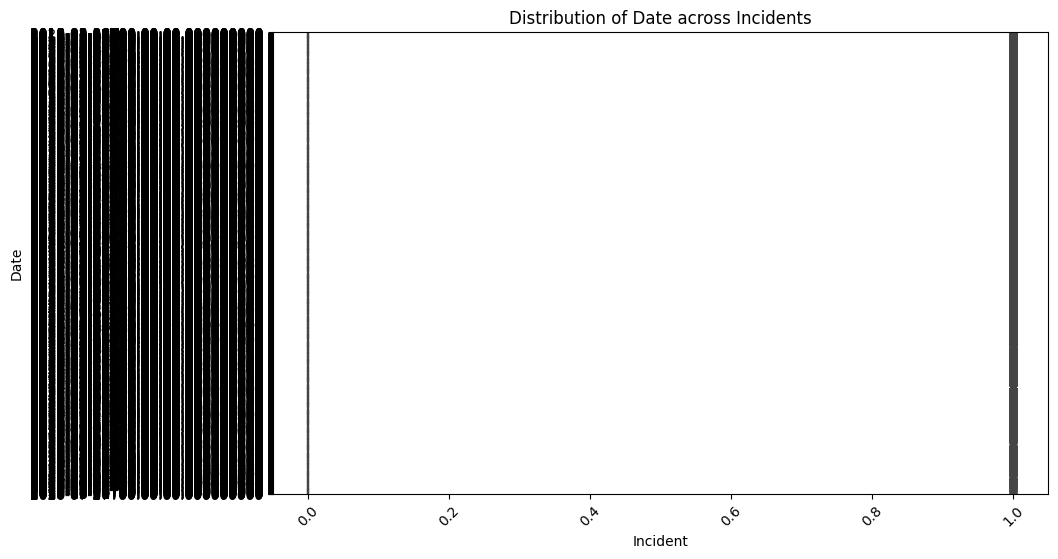

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x='Incident')
plt.title('Distribution of Incidents')
plt.xlabel('Incident')
plt.ylabel('Count')
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Date', y='Incident')
plt.title('Relationship between Date and Incident')
plt.xlabel('Date')
plt.ylabel('Incident')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Incident', y='Date')
plt.title('Distribution of Date across Incidents')
plt.xlabel('Incident')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()


In [55]:
incident_counts = df1['Incident'].value_counts()
print(incident_counts)


0    3118079
1      67218
Name: Incident, dtype: int64


In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1['Patient-Uid_Encoded'] = encoder.fit_transform(df1['Patient-Uid'])



In [17]:
df1.drop('Patient-Uid', axis=1, inplace=True)


In [56]:
grouped_data = df1.groupby(['Patient-Uid', 'Date']).agg({'Incident': 'sum'}).reset_index()
grouped_data = grouped_data.rename(columns={'Patient-Uid':'Patient_Uid'})
grouped_data = grouped_data.sort_values(['Patient_Uid', 'Date'], ascending=True)
grouped_data

,Patient_Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0
...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1


In [57]:
grouped_data.sort_values(['Patient_Uid', 'Date'], inplace=True)
grouped_data['Eligibility'] = 0

for index, row in grouped_data.iterrows():
    if row['Incident'] > 0 and grouped_data.at[index, 'Eligibility'] == 0:
        grouped_data.at[index, 'Eligibility'] = 1
        grouped_data.loc[index+1:, 'Eligibility'] = 0

print(grouped_data)



                                  Patient_Uid       Date  Incident  \
0        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2015-09-22         0   
1        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-04-13         0   
2        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-05-02         0   
3        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-23         0   
4        a0db1e73-1c7c-11ec-ae39-16262ee38c7f 2018-11-24         0   
...                                       ...        ...       ...   
2341872  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-06-19         0   
2341873  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-09         1   
2341874  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-07-10         0   
2341875  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-05         1   
2341876  a0f0d582-1c7c-11ec-a6c1-16262ee38c7f 2020-08-08         0   

         Eligibility  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ... 

In [20]:
grouped_data = grouped_data[['Patient_Uid', 'Date', 'Eligibility', 'Incident']]
grouped_data

,Patient_Uid,Date,Eligibility,Incident
0,0,2015-09-22,0,0
1,0,2018-04-13,0,0
2,0,2018-05-02,0,0
3,0,2018-11-23,0,0
4,0,2018-11-24,0,0
...,...,...,...,...
2341872,27032,2020-06-19,0,0
2341873,27032,2020-07-09,1,1
2341874,27032,2020-07-10,0,0
2341875,27032,2020-08-05,1,1


**This feature indicates how many times the patient has become eligible for the drug before the current record.**

In [58]:
grouped_data['Num_Previous_Occurrences'] = grouped_data.groupby('Patient_Uid')['Eligibility'].cumsum().shift(fill_value=0)
grouped_data

,Patient_Uid,Date,Incident,Eligibility,Num_Previous_Occurrences
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,0
...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,1
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,2
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,2


**This feature captures the duration since the patient last became eligible for the drug.**

In [59]:
grouped_data['Time_Since_Last_Occurrence'] = grouped_data.groupby('Patient_Uid')['Date'].diff().dt.days.shift(fill_value=0)
grouped_data

,Patient_Uid,Date,Incident,Eligibility,Num_Previous_Occurrences,Time_Since_Last_Occurrence
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,0,0.0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,0,NaN
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,0,934.0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,0,19.0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,0,205.0
...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,1,13.0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,1,1.0
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,2,20.0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,2,1.0


In [60]:
grouped_data['Month'] = grouped_data['Date'].dt.month
grouped_data['DayOfWeek'] = grouped_data['Date'].dt.dayofweek
grouped_data['Quarter'] = grouped_data['Date'].dt.quarter
grouped_data

,Patient_Uid,Date,Incident,Eligibility,Num_Previous_Occurrences,Time_Since_Last_Occurrence,Month,DayOfWeek,Quarter
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,0,0,0,0.0,9,1,3
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,0,0,0,NaN,4,4,2
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,0,0,0,934.0,5,2,2
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,0,0,0,19.0,11,4,4
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-24,0,0,0,205.0,11,5,4
...,...,...,...,...,...,...,...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,0,0,1,13.0,6,4,2
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,1,1,1,1.0,7,3,3
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,0,0,2,20.0,7,4,3
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-05,1,1,2,1.0,8,2,3


In [61]:
grouped_data['Time_Since_Last_Occurrence'].ffill(inplace=True)


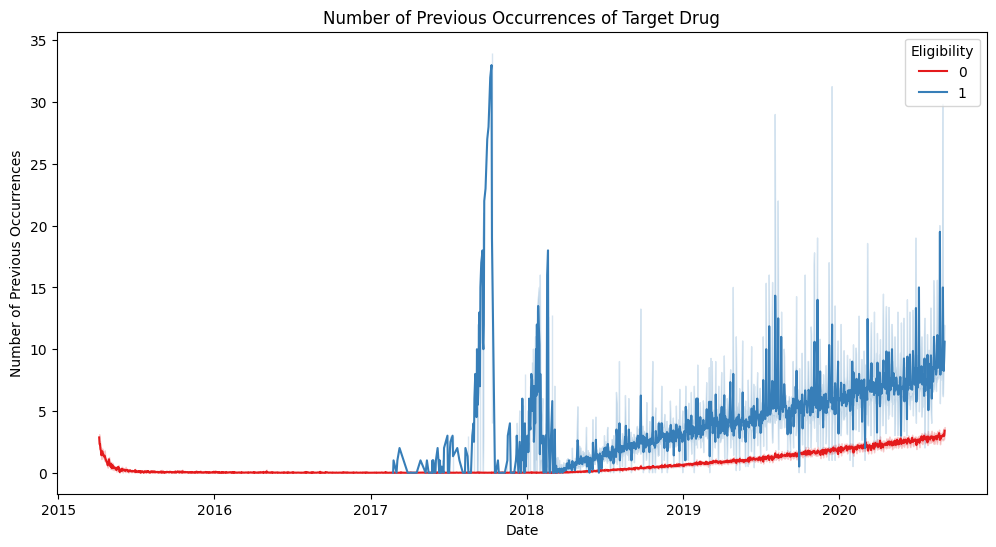

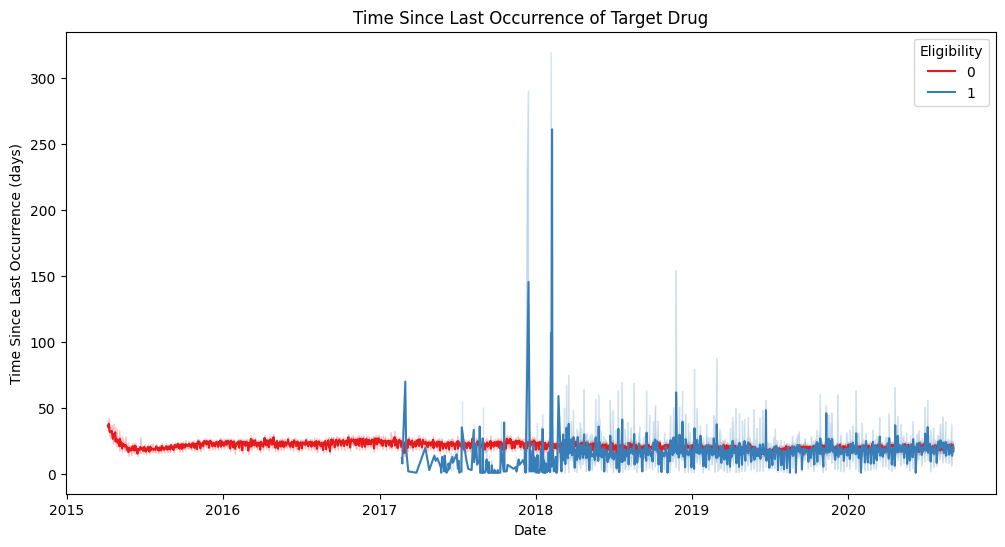

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the Number of Previous Occurrences
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Date', y='Num_Previous_Occurrences', hue='Eligibility', palette='Set1')
plt.xlabel('Date')
plt.ylabel('Number of Previous Occurrences')
plt.title('Number of Previous Occurrences of Target Drug')
plt.legend(title='Eligibility', loc='upper right')
plt.show()

# Plotting the Time Since Last Occurrence
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='Date', y='Time_Since_Last_Occurrence', hue='Eligibility', palette='Set1')
plt.xlabel('Date')
plt.ylabel('Time Since Last Occurrence (days)')
plt.title('Time Since Last Occurrence of Target Drug')
plt.legend(title='Eligibility', loc='upper right')
plt.show()


In [31]:
grouped_data.Eligibility.unique()

array([0, 1])

**Spliting the Data**

In [66]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = grouped_data[['Num_Previous_Occurrences', 'Time_Since_Last_Occurrence', 'Month', 'DayOfWeek', 'Quarter']] #, 'Num_Previous_Occurrences', 'Time_Since_Last_Occurrence', 'Month', 'DayOfWeek', 'Quarter','Patient_Uid', 'Date', 
y = grouped_data['Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Balancing the data**

In [33]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance t he data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

# Convert 'Date' column to numerical representation
encoder = OrdinalEncoder()
X_train['Date'] = encoder.fit_transform(X_train[['Date']])
X_test['Date'] = encoder.transform(X_test[['Date']])

# Define the oversampler and undersampler
oversampler = SMOTE(random_state=42)
undersampler = RandomUnderSampler(random_state=42)

# Create a pipeline with oversampling and undersampling
pipeline = Pipeline([('oversample', oversampler), ('undersample', undersampler)])

# Apply the pipeline to the training data
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the balanced training data
X_train_scaled = scaler.fit_transform(X_train_balanced)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and X_test_scaled for further modeling


In [ ]:
from imblearn.over_sampling import SMOTE

# Exclude the 'Date' column from X_train before resampling
X_train_resample = X_train.drop('Date', axis=1)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_resample, y_train)

# Print the class distribution after balancing
print("Before balancing:")
print(y_train.value_counts())

print("After balancing:")
print(y_train_balanced.value_counts())



Before balancing:
0    1819702
1      53799
Name: Eligibility, dtype: int64
After balancing:
0    1819702
1    1819702
Name: Eligibility, dtype: int64


**Scaling the Data**

In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_balanced)

# Transform the test set (using the same scaler)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train_balanced)

# Scale the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Print the data before scaling
print("Before scaling:")
print(X_train_balanced.head())

# Print the data after scaling
print("After scaling:")
print(X_train_scaled)


Before scaling:
   Patient_Uid    Date  Num_Previous_Occurrences  Time_Since_Last_Occurrence  \
0        22252  1657.0                         0                        11.0   
1        13810  1491.0                         0                        50.0   
2        12825  1360.0                         0                         1.0   
3         8659  1731.0                         0                         6.0   
4         9435  1691.0                         0                        11.0   

   Month  DayOfWeek  Quarter  
0     10          6        4  
1      5          1        2  
2     12          3        4  
3      1          3        1  
4     11          5        4  
After scaling:
[[ 0.56972362  0.67708548  0.         ...  1.12166858  2.27914062
   1.45032896]
 [-0.60334503  0.35188604  0.         ... -0.40915137 -1.07526106
  -0.42560327]
 [-0.74021693  0.09525274  0.         ...  1.73399655  0.26649961
   1.45032896]
 ...
 [ 0.62141535  0.35674196  0.         ... -0.40915137 

**Logistic Regression**

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_balanced)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUROC Score:", auroc)





Accuracy: 0.899207047329496
F1 Score: 0.28302832409446427
AUROC Score: 0.7998183709169024


**Decision Tree**

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Create a decision tree classifier with predefined hyperparameters
model = DecisionTreeClassifier(max_depth=25, min_samples_split=7, min_samples_leaf=14, random_state=30)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_balanced)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUROC Score:", auroc)



Accuracy: 0.9008061898987139
F1 Score: 0.3034065011394986
AUROC Score: 0.8295708021766021


**XG Boost**

In [75]:
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score

# Create an XGBoost classifier with predefined hyperparameters
model = xgb.XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100, random_state=42)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_balanced)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("F1 Score:", f1)
print("AUROC Score:", auroc)


F1 Score: 0.30707109419912954
AUROC Score: 0.8647361391716708


**Random Forest**

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

# Create a Random Forest classifier with predefined hyperparameters
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train_balanced)

# Make predictions on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate AUROC score
auroc = roc_auc_score(y_test, y_pred)

# Print the scores
print("F1 Score:", f1)
print("AUROC Score:", auroc)



F1 Score: 0.301491673462945
AUROC Score: 0.8708000726287736


In [78]:
# save the final predictions to a csv file
grouped_data[["Patient_Uid", "Eligibility"]].to_csv("final_submission1.csv", index=False)

In [80]:
#TESTING THE SAVED CSV FILE
df= pd.read_csv("/content/final_submission1.csv")
df

,Patient_Uid,Eligibility
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
1,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
2,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
3,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
4,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
...,...,...
2341872,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0
2341873,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,1
2341874,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,0
2341875,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,1


**Xg Boost Gives the Better F1 Score**